#  <span style="color:orange">Clasificacion del uso de la tarjeta de credito</span>

# Obtención de los datos

In [2]:
#!pip install pycaret
import pycaret
pycaret.__version__


'2.0.0'

In [3]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [5]:
#check the shape of data
dataset.shape

(24000, 24)

In [6]:
##########
## aca tomamos una muestra del 95% del total del dataset
## esta muestra es "aleatoria", con la semilla 786.
## luego en data_unseen (data no vista) ponemos lo que sacamos del
## dataset
## de esta forma el dataset se divide en dos
## un 95% va para data : sera para el modelado
## un 5% va para data_unseen : este va a ser para predicciones.

data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


# Preprocesamiento de los datos

In [7]:
from pycaret.classification import *

In [8]:
exp_clf101 = setup(data = data, target = 'default', session_id=123) 

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(22800, 24)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Comparación de modelos

In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ridge Classifier,0.8236,0.0000,0.3646,0.6932,0.4776,0.3836,0.4124,0.0540
1,Linear Discriminant Analysis,0.8236,0.7703,0.3813,0.6818,0.4888,0.3923,0.4167,0.3912
2,Light Gradient Boosting Machine,0.8231,0.7854,0.3895,0.6738,0.4934,0.3954,0.4173,0.5268
3,Gradient Boosting Classifier,0.8225,0.7888,0.3652,0.6868,0.4765,0.3815,0.4093,12.7841
4,CatBoost Classifier,0.8203,0.7882,0.3839,0.6626,0.4859,0.3862,0.4075,17.9650
5,Ada Boost Classifier,0.8185,0.7783,0.3507,0.6729,0.4607,0.3644,0.3926,3.2561
6,Extreme Gradient Boosting,0.8146,0.7670,0.3822,0.6349,0.4767,0.3726,0.3905,2.5056
7,Random Forest Classifier,0.8093,0.7401,0.3363,0.6295,0.4382,0.3359,0.3600,0.2315
8,Extra Trees Classifier,0.8091,0.7501,0.3841,0.6083,0.4707,0.3615,0.3758,1.1284
9,Quadratic Discriminant Analysis,0.7891,0.7392,0.1725,0.6266,0.2368,0.1689,0.2305,0.2699


In [10]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


# Creacion de modelos

In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.823600,0.000000,0.364600,0.693200,0.477600,0.383600
1,Linear Discriminant Analysis,0.823600,0.770300,0.381300,0.681800,0.488800,0.392300
2,Gradient Boosting Classifier,0.822500,0.788700,0.364900,0.687000,0.476300,0.381300
3,Extreme Gradient Boosting,0.821800,0.789400,0.359500,0.686200,0.471500,0.376700
4,CatBoost Classifier,0.821600,0.786700,0.386400,0.667800,0.489300,0.390400
5,Light Gradient Boosting Machine,0.821400,0.785900,0.387800,0.666300,0.490000,0.390800
6,Ada Boost Classifier,0.818500,0.778300,0.350700,0.672900,0.460700,0.364400
7,Extra Trees Classifier,0.809300,0.753300,0.383900,0.610000,0.471100,0.362000
8,Random Forest Classifier,0.808400,0.738000,0.333700,0.625400,0.434900,0.332300
9,Quadratic Discriminant Analysis,0.789300,0.739200,0.173400,0.627600,0.237800,0.169800


### Decision Tree Classifier

In [12]:
## para saber cuales son los modelos posibles de ser creados>
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [13]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7224,0.6109,0.4108,0.3816,0.3956,0.2158,0.2160
1,0.7199,0.6225,0.4448,0.3848,0.4126,0.2300,0.2310
2,0.7400,0.6310,0.4363,0.4162,0.4260,0.2580,0.2582
3,0.7262,0.6094,0.3966,0.3846,0.3905,0.2140,0.2140
4,0.7306,0.6090,0.3909,0.3909,0.3909,0.2180,0.2180
5,0.7331,0.6381,0.4646,0.4090,0.4350,0.2612,0.2621
6,0.7155,0.6137,0.4306,0.3753,0.4011,0.2157,0.2166
7,0.7462,0.6363,0.4391,0.4282,0.4336,0.2701,0.2701
8,0.7318,0.6209,0.4221,0.3995,0.4105,0.2371,0.2372
9,0.7354,0.6194,0.4079,0.4034,0.4056,0.2355,0.2355


In [14]:
#trained model object is stored in the variable 'dt'. 
# si impimimos el modelo, nos muestra los hiperparametros con los
# que automaticamente configuro
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


Se pueden entrenar distintos modelos
En este caso tambien entrenaremos Neighbors Classifier

### Neighbors Classifier

In [15]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7412,0.5881,0.1671,0.3315,0.2222,0.0868,0.0941
1,0.7350,0.5787,0.1473,0.2989,0.1973,0.0601,0.0655
2,0.7632,0.6641,0.2096,0.4277,0.2814,0.1590,0.1735
3,0.7462,0.5982,0.1530,0.3375,0.2105,0.0842,0.0936
4,0.7550,0.6096,0.2040,0.3956,0.2692,0.1397,0.1508
5,0.7607,0.6200,0.1841,0.4088,0.2539,0.1351,0.1504
6,0.7406,0.5884,0.1700,0.3315,0.2247,0.0880,0.0951
7,0.7600,0.6139,0.1898,0.4085,0.2592,0.1383,0.1528
8,0.7487,0.6106,0.1898,0.3681,0.2505,0.1177,0.1270
9,0.7542,0.6254,0.1870,0.3860,0.2519,0.1256,0.1374


### Random Forest Classifier

In [16]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.7531,0.3428,0.6269,0.4432,0.3400,0.3626
1,0.8127,0.7451,0.3399,0.6452,0.4453,0.3453,0.3710
2,0.8076,0.7714,0.3258,0.6250,0.4283,0.3262,0.3512
3,0.7989,0.7185,0.3144,0.5842,0.4088,0.3006,0.3215
4,0.8051,0.7249,0.3229,0.6129,0.4230,0.3191,0.3428
5,0.8152,0.7324,0.3569,0.6495,0.4607,0.3603,0.3839
6,0.8039,0.7244,0.3371,0.6010,0.4319,0.3246,0.3444
7,0.8158,0.7711,0.3399,0.6630,0.4494,0.3523,0.3807
8,0.8139,0.7183,0.3258,0.6609,0.4364,0.3400,0.3706
9,0.8107,0.7419,0.3569,0.6269,0.4549,0.3506,0.3710


# Optimización del modelo

### 9.1 Decision Tree Classifier

In [18]:
## tuned_dt = tune_model('dt') 
##  The behavior of tune_model in version 1.0.1 is changed. Please pass trained model object.
## si no se le pasa el metodo de optimizacion va 
## a optimizar el accuracy.
## como el accuracy no es la mejor manera de optimizar
## cuando los datos estan desbalanceados, les vamos a indicar
## que optimice por el area bajo la curva *area under curve*


tuned_dt = tune_model(dt, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8271,0.7213,0.3258,0.7516,0.4545,0.3703,0.4162
1,0.8208,0.7211,0.3031,0.7279,0.4280,0.3425,0.3889
2,0.8120,0.7155,0.3484,0.6373,0.4505,0.3487,0.3719
3,0.8114,0.7089,0.2691,0.6884,0.3870,0.2999,0.3463
4,0.8195,0.6942,0.2975,0.7241,0.4217,0.3362,0.3831
5,0.8239,0.7059,0.3031,0.7535,0.4323,0.3498,0.4008
6,0.8095,0.7130,0.2663,0.6763,0.3821,0.2939,0.3387
7,0.8271,0.7433,0.2918,0.7984,0.4274,0.3505,0.4124
8,0.8164,0.7094,0.2720,0.7273,0.3959,0.3132,0.3661
9,0.8150,0.6921,0.3626,0.6465,0.4646,0.3633,0.3856


In [46]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)
## se puede ver que estos hiperparametros son distintos a 
## los que se asignaron al crear el modelo.
## estan optimizados.

## las diferencias
print('originalmente:', dt)

print('optimizado:', tuned_dt)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=76, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
originalmente: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
optimizado: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=76

### 9.2 K Neighbors Classifier

In [48]:
import numpy as np
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7751,0.6495,0.0708,0.4464,0.1222,0.0657,0.1035
1,0.7769,0.6661,0.0652,0.4694,0.1144,0.0640,0.1064
2,0.7832,0.7060,0.1133,0.5479,0.1878,0.1212,0.1724
3,0.7769,0.6409,0.0623,0.4681,0.1100,0.0612,0.1036
4,0.7769,0.6503,0.0708,0.4717,0.1232,0.0694,0.1119
5,0.7788,0.6848,0.0878,0.5000,0.1494,0.0892,0.1351
6,0.7813,0.6518,0.0765,0.5400,0.1340,0.0837,0.1381
7,0.7845,0.6588,0.0935,0.5789,0.1610,0.1060,0.1659
8,0.7769,0.6564,0.0652,0.4694,0.1144,0.0640,0.1064
9,0.7812,0.6802,0.0935,0.5323,0.1590,0.0995,0.1506


In [49]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=40, p=2,
                     weights='distance')


### Random Forest Classifier

In [50]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8258,0.7863,0.3654,0.7049,0.4813,0.3891,0.4194
1,0.8227,0.7977,0.3541,0.6944,0.4690,0.3758,0.4066
2,0.8233,0.8225,0.3853,0.6766,0.4910,0.3937,0.4165
3,0.8177,0.7713,0.3598,0.6615,0.4661,0.3675,0.3923
4,0.8227,0.7805,0.3513,0.6966,0.4670,0.3743,0.4059
5,0.8227,0.7955,0.3683,0.6842,0.4788,0.3834,0.4101
6,0.8158,0.7568,0.3371,0.6648,0.4474,0.3507,0.3799
7,0.8377,0.7941,0.3768,0.7733,0.5067,0.4231,0.4623
8,0.8227,0.7671,0.3569,0.6923,0.4710,0.3773,0.4073
9,0.8138,0.7833,0.3654,0.6386,0.4649,0.3621,0.3828


# Visualización de los resultados del modelo

###  AUC Plot

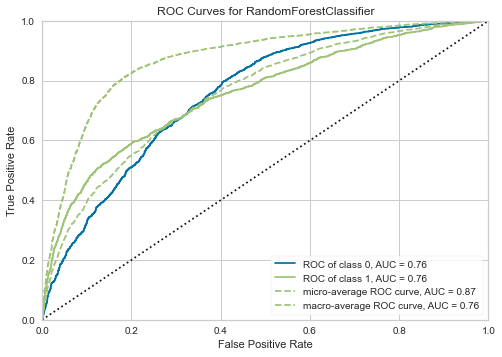

In [51]:
plot_model(tuned_rf, plot = 'auc')
##Muestra la optimizacion del area bajo la curva.
## mientras menor area bajo la curva, mejor es el modelo...


### Precision-Recall Curve

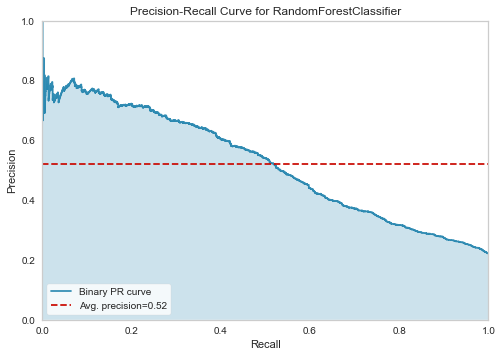

In [52]:
plot_model(tuned_rf, plot = 'pr')

### Distribución de factores importantes

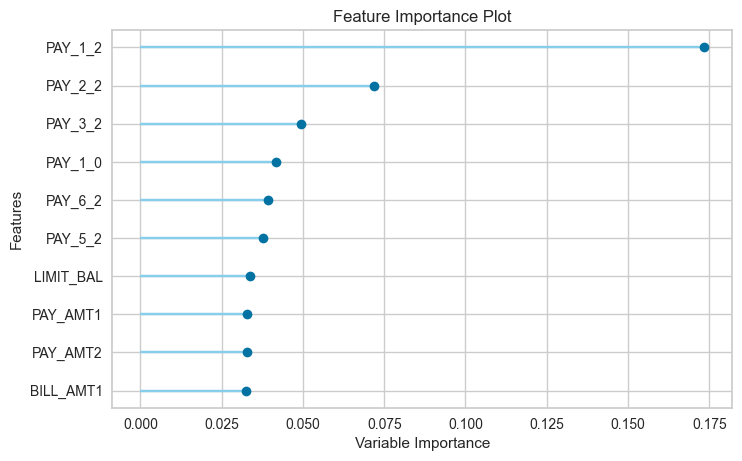

In [53]:
plot_model(tuned_rf, plot='feature')

### Matriz de confusión

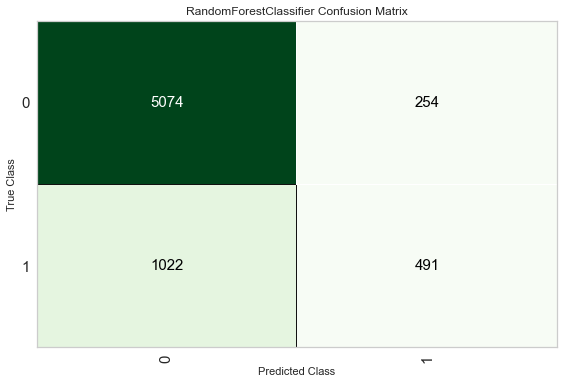

In [54]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [55]:
## esto genera de forma interactiva los distintos graficos...

evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Predicción

In [56]:
predict_model(tuned_rf);
## si el accuracy de las predicciones es menor que el del
## entrenamiento, en los datos de test, se esta dando un overfitting 
## por lo que hay que volver a entrenar.


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8135,0.7563,0.3245,0.6591,0.4349,0.3383,0.3688


# Finalización del modelo

In [57]:
##aca se entrena con TODOS los datos, los que habiamos excluido 
## al principio tambien van.

final_rf = finalize_model(tuned_rf)

In [58]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [59]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8345,0.8222,0.3629,0.7657,0.4924,0.4082,0.4489


# Predicción con datos de test

In [60]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.1891
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.0481
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.1685
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7434
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.2173


# Guardar el modelo

In [39]:
save_model(final_rf,'Final RF Model 08Feb2020')

Transformation Pipeline and Model Succesfully Saved


# 15.0 Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [40]:
saved_final_rf = load_model('Final RF Model 08Feb2020')

Transformation Pipeline and Model Sucessfully Loaded


In [41]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

In [42]:
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.1917
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.0531
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.1970
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7300
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.2164
